# Logistic Regression

# Intuition 
Logistic Regression in a **classification** algorithm used to predict a **binary outcome** (e.g., 0/1, yes/no, cat/dog, spam/not spam).

Instead of predicting a continuous value like Linear Regression, Logistic Regression predicts the **probability** that an input belongs to a particular class. 

---

## From Linear to Logistic 

Linear Regression models the relationship as: 

$$
\hat{y} = W^T X + b
$$

But this output can take any value from $-\infty$ to $+\infty$ , which is not suitable for probabilities. 

to fix this, Logistic Regression applies a **sigmoid function** to squash the output into the range $[0, 1]$.

---

## Sigmoid Function 

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Where: 
- $z = W^T X + b$
- Output represents $P(y = 1 \mid X)$

### Key Properties 
- Output is always between 0 and 1
- Differentiable (important for optimization)

---

## Model Definition 

$$
\hat{y} = \sigma(W^T X + b)
$$

- if $\hat{y} \geq 0.5$  → class 1 
- else → class 0

---

## Loss Function: Binary Cross-Entropy 


$$
\mathcal{L}(y, \hat{y}) = - \big(y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\big)
$$

---

## Cost Function 

For a dataset with $n$ samples: 

$$
J(W, b) = \frac{1}{n} \sum_{i=1}^{n} \mathcal{L}(y^{(i)}, \hat{y}^{(i)})
$$

Goal: minimize $J(W, b)$

---

## Optimization: Gradient Descnet 

Parameters are updated interactively: 

$$
W := W - \alpha \frac{\partial J}{\partial W}
$$

$$
b := b - \alpha \frac{\partial J}{\partial b}
$$

Where $\alpha$ is the learning rate.

In [55]:
# Imports 
import numpy as np 
import matplotlib.pyplot as plt 

In [56]:
# Sigmoid Function
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

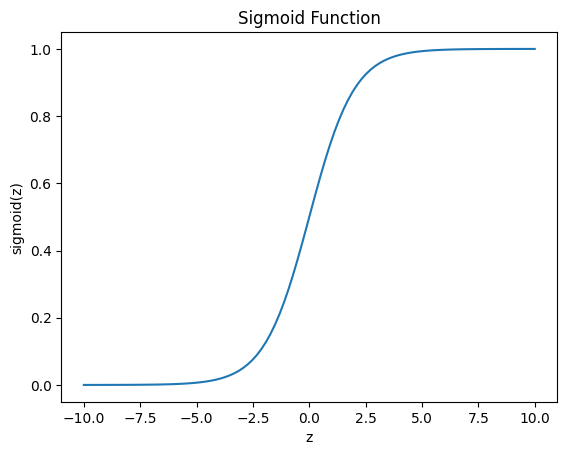

In [57]:
# Visualize Sigmoid Function 
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.title("Sigmoid Function")
plt.show;

In [58]:
# Binary Cross-Entropy Cost Function 
def binary_cross_entropy(y, y_hat, eps=1e-15):
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

### Logistic Regression Model From Scratch 
First we want to Build the model without using any ML library 

In [59]:
class LogisticRegressionModel: 
    def __init__(self, learning_rate=0.01, n_iterations=1000): 
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.W = None 
        self.b = None
        self.losses = []
    
    def fit(self, X, y): 
        n_samples, n_features = X.shape 
        self.W = np.zeros(n_features)
        self.b = 0.0
        
        for _ in range(self.n_iterations): 
            linear_out = np.dot(X, self.W) + self.b
            y_hat = sigmoid(linear_out)
            
            loss = binary_cross_entropy(y, y_hat)
            self.losses.append(loss)
            
            dw = (1 / n_samples) * np.dot(X.T, (y_hat - y))
            db = (1 / n_samples) * np.sum(y_hat - y)
            
            self.W -= self.learning_rate * dw 
            self.b -= self.learning_rate * db 
            
    def predict_probs(self, X): 
        linear_out = np.dot(X, self.W) + self.b
        return sigmoid(linear_out)
        
    def predict(self, X, threshold=0.5):
        return (self.predict_probs(X) >= threshold).astype(int)

In [60]:
# Train the Model on a dataset 
from sklearn.datasets import make_classification

X, y = make_classification(
n_samples=500,
n_features=2,
n_redundant=0,
n_clusters_per_class=1,
random_state=42
)

model_scratch = LogisticRegressionModel(learning_rate=0.1, n_iterations=1000)
model_scratch.fit(X, y)

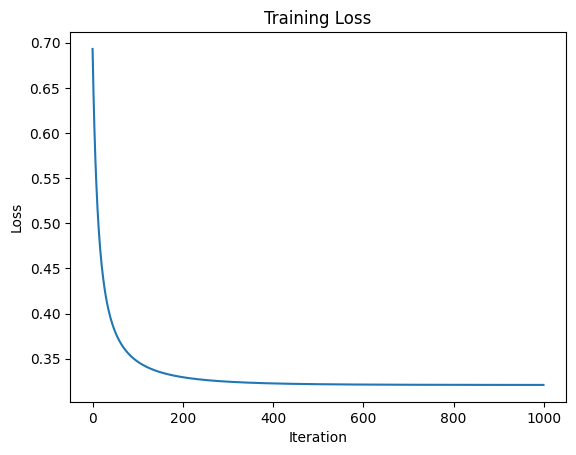

In [61]:
# Plot losses
plt.plot(model.losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

In [63]:
# a Function to Visualize Decision Boundary 
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200))

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid).reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.show()

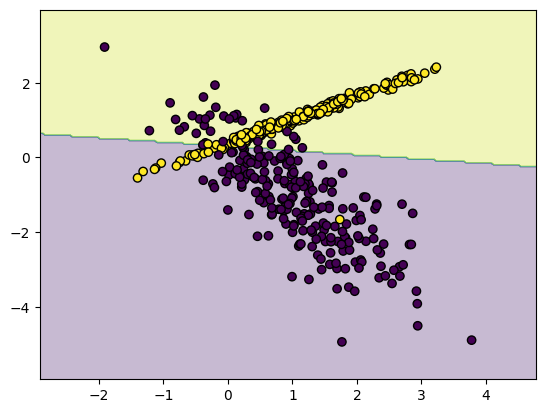

In [64]:
# Visualize Decision Boundary (from scratch model)
plot_decision_boundary(X, y, model_scratch)

### Logistic Regression with scikit-learn
Now we just fit the scikit-learn logistic regression model on our data

In [52]:
# Imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fit the model
model_sk = LogisticRegression(fit_intercept=True, solver="lbfgs")
model_sk.fit(X, y);

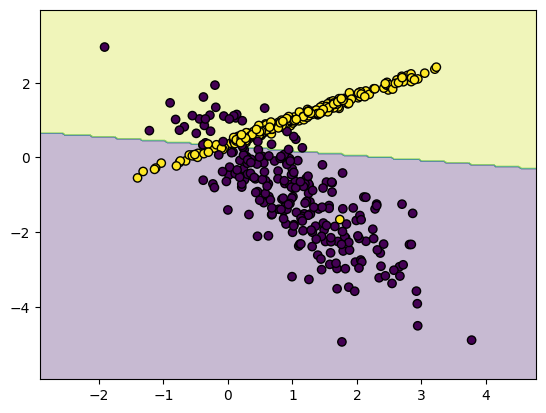

In [54]:
# Visualize Decision Boundary (scikit-learn model)
plot_decision_boundary(X, y, model_sk)